In [1]:
from pathlib import Path

import trimesh
import matplotlib.pyplot as plt

from signatures.laplace import laplacian_beltrami
from signatures.signatures import heat_kernel_signatures


In [2]:
file_path = Path("../data/bunny.obj")


In [3]:
mesh = trimesh.load(file_path)
vertices = mesh.vertices
faces = mesh.faces

n_time_steps = 10
signature = heat_kernel_signatures(
    mesh = mesh,
    n_basis = 400,
    n_time_steps = n_time_steps,
    # t_min = 1e-4, t_max = 4e-4,
    laplacian = laplacian_beltrami,
    device="cuda"
)
signature


tensor([[2.2608e-04, 2.3780e-04, 2.5076e-04,  ..., 3.3766e-04, 3.6009e-04,
         3.8436e-04],
        [8.4758e-03, 8.8398e-03, 9.2358e-03,  ..., 1.1729e-02, 1.2331e-02,
         1.2965e-02],
        [2.6621e-02, 2.7590e-02, 2.8651e-02,  ..., 3.5696e-02, 3.7564e-02,
         3.9638e-02],
        ...,
        [6.7922e-01, 6.8715e-01, 6.9732e-01,  ..., 7.9486e-01, 8.2564e-01,
         8.6034e-01],
        [7.7434e+01, 7.4677e+01, 7.1725e+01,  ..., 5.5173e+01, 5.1792e+01,
         4.8483e+01],
        [1.6271e+00, 1.6833e+00, 1.7432e+00,  ..., 2.0884e+00, 2.1630e+00,
         2.2377e+00]], device='cuda:0')

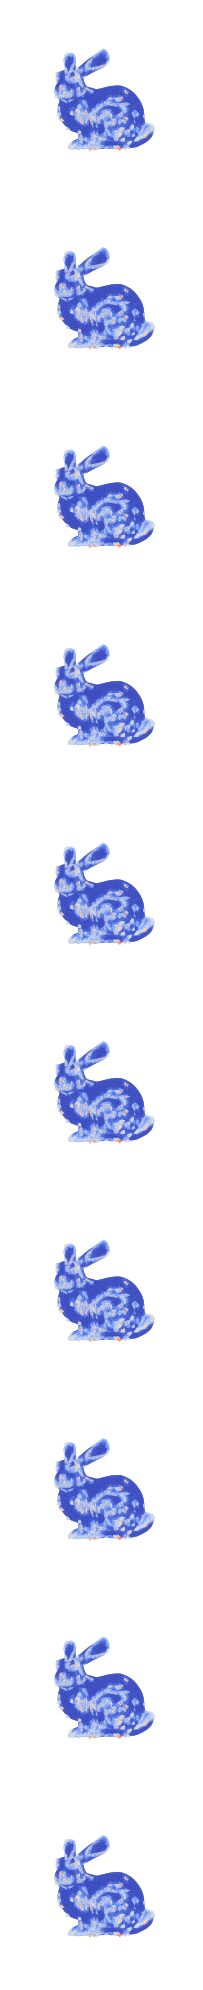

In [5]:
fig = plt.figure(figsize=(200, 20))
for i in range(n_time_steps):
    ax = fig.add_subplot(n_time_steps, 1, i+1, projection='3d')
    ax.plot_trisurf(vertices[:, 0], vertices[:, 1], signature.cpu()[:, 1], triangles=faces, cmap="coolwarm")
    ax.view_init(90, 0, 90)
    ax.set_axis_off()
fig.tight_layout()
